Morphological Operators are sets of kernels that can achieve a variety of effects such as reducing noise. Certain operators are very good at reducing black points on a white background(and vice versa).

Certain operators can also achieve an erosion and dilation effect that can add or erode from an existing image. This effect is most easily seen on text data, so we will use simple white text on a black background.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

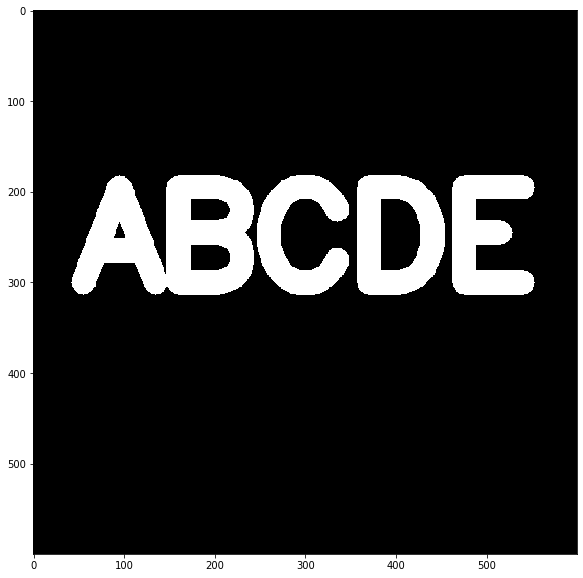

In [7]:
img = load_img()
display_img(img)

In [8]:
kernel = np.ones((5,5),dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

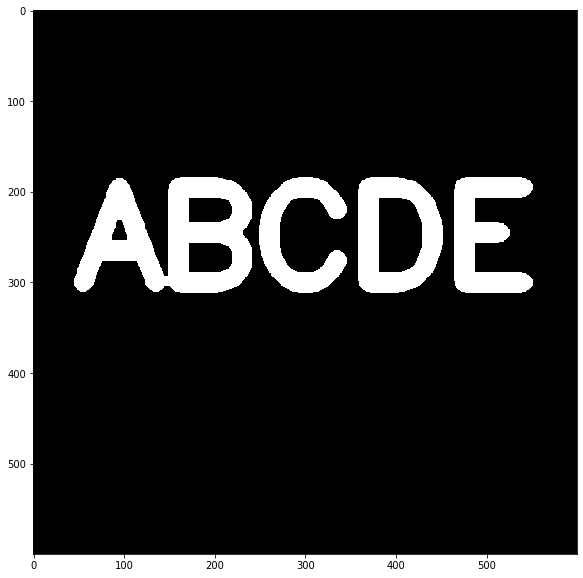

In [9]:
result = cv2.erode(img,kernel,iterations=1)
display_img(result)

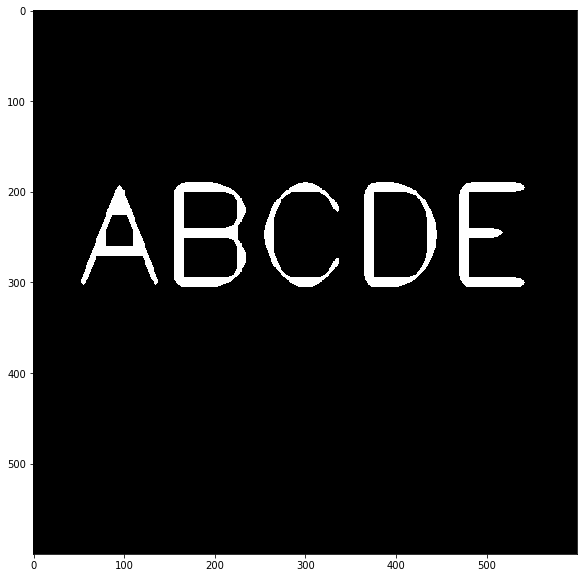

In [11]:
result = cv2.erode(img,kernel,iterations=4)
display_img(result)

In [13]:
# Opening is erosion followed by dilation

img = load_img()
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [14]:
white_noise

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]])

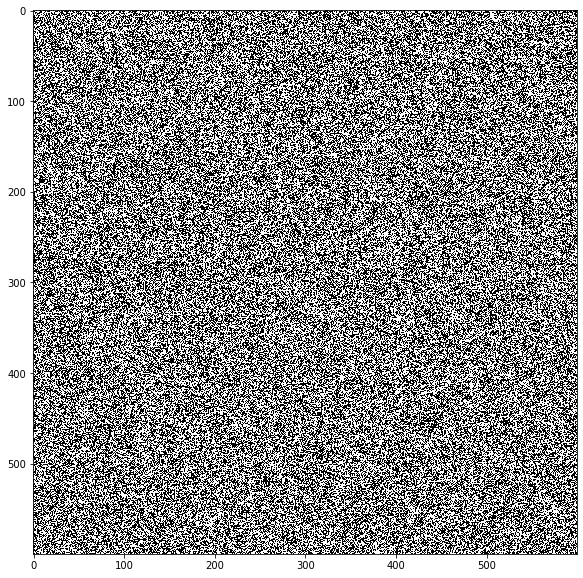

In [15]:
display_img(white_noise)

In [16]:
white_noise = white_noise*255

In [17]:
white_noise

array([[255, 255, 255, ...,   0,   0,   0],
       [255,   0, 255, ...,   0,   0,   0],
       [255, 255,   0, ..., 255,   0,   0],
       ...,
       [  0, 255,   0, ..., 255,   0, 255],
       [255, 255, 255, ..., 255,   0,   0],
       [  0,   0, 255, ..., 255,   0,   0]])

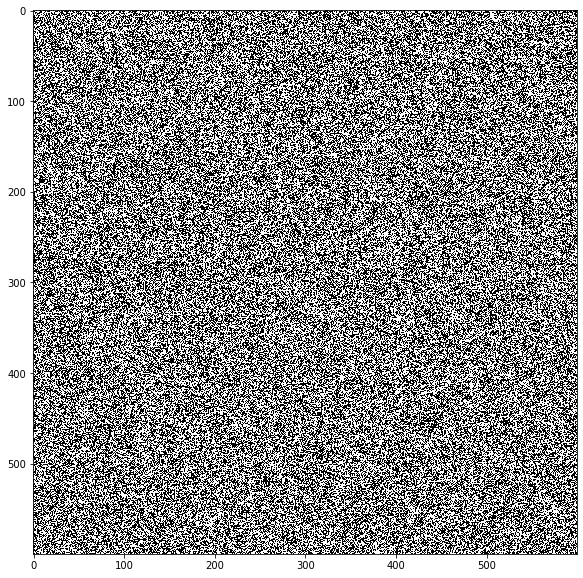

In [18]:
display_img(white_noise)

In [19]:
noise_img = white_noise+img

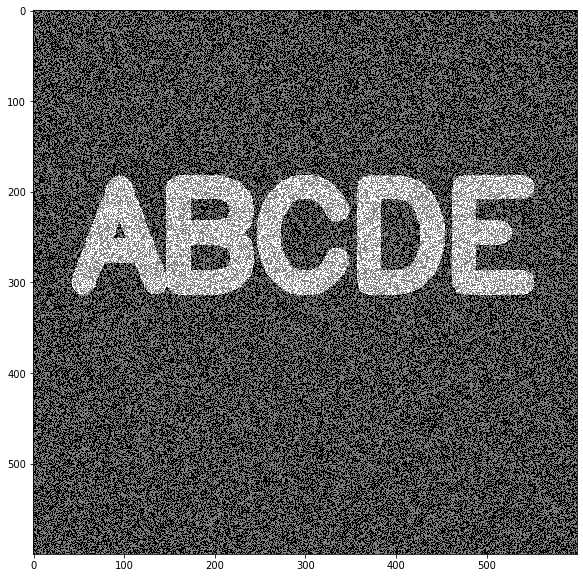

In [20]:
display_img(noise_img)

In [21]:
# Opening is erosion followed by dilation. Opening helps in clearing out a lot of background noise as seen in the image below
opening= cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

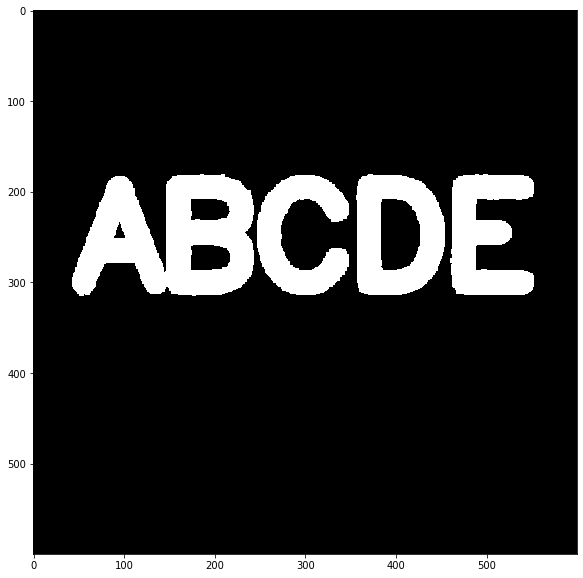

In [22]:
display_img(opening)

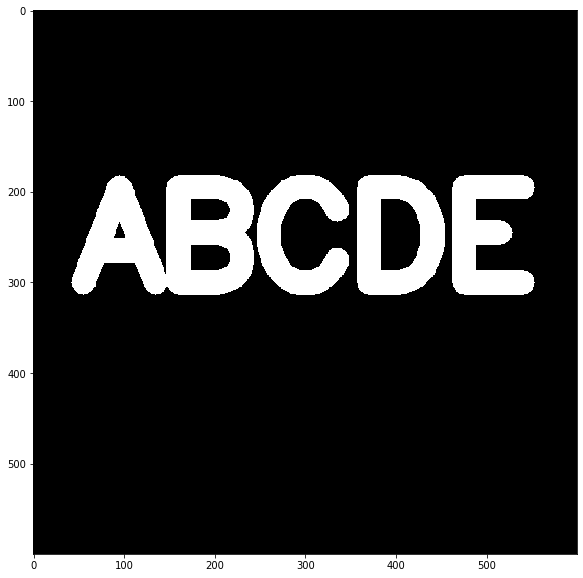

In [23]:
display_img(img)

In [24]:
img = load_img()

In [25]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))
black_noise

array([[0, 1, 1, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1]])

In [26]:
black_noise = black_noise*-255

In [27]:
black_noise

array([[   0, -255, -255, ...,    0, -255, -255],
       [-255,    0, -255, ..., -255, -255, -255],
       [-255,    0,    0, ...,    0,    0, -255],
       ...,
       [   0,    0, -255, ..., -255,    0,    0],
       [   0, -255, -255, ...,    0, -255, -255],
       [-255, -255,    0, ..., -255, -255, -255]])

In [28]:
black_noise_img = img+black_noise

In [29]:
black_noise_img

array([[   0., -255., -255., ...,    0., -255., -255.],
       [-255.,    0., -255., ..., -255., -255., -255.],
       [-255.,    0.,    0., ...,    0.,    0., -255.],
       ...,
       [   0.,    0., -255., ..., -255.,    0.,    0.],
       [   0., -255., -255., ...,    0., -255., -255.],
       [-255., -255.,    0., ..., -255., -255., -255.]])

In [30]:
black_noise_img[black_noise_img==-255]=0

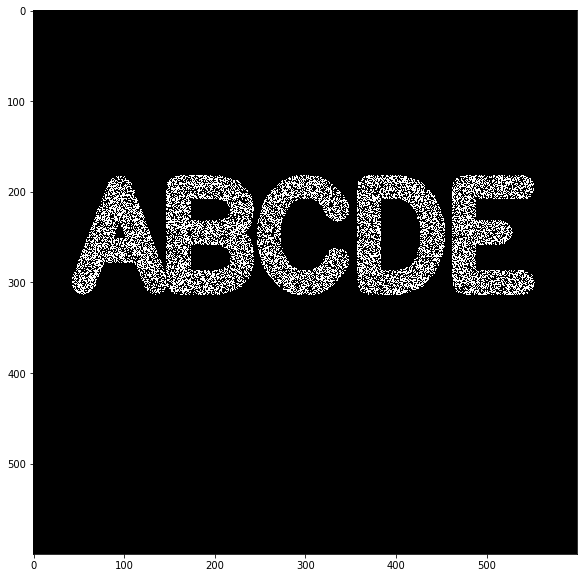

In [31]:
display_img(black_noise_img)

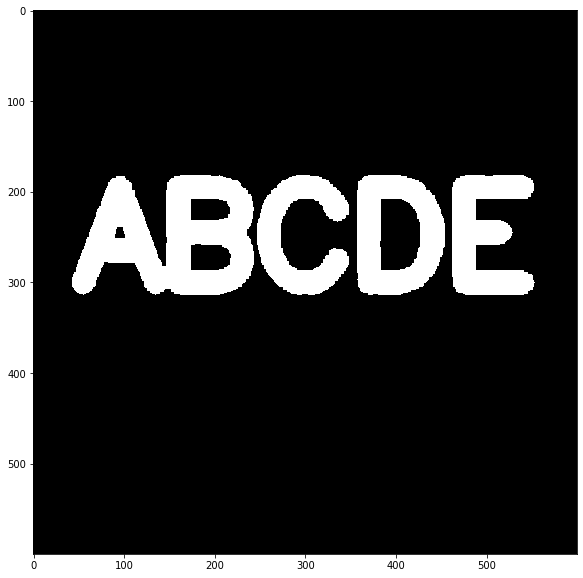

In [32]:
# Closing is helpful for removing foreground noise. It is just the opposite of opening
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

In [33]:
img = load_img()

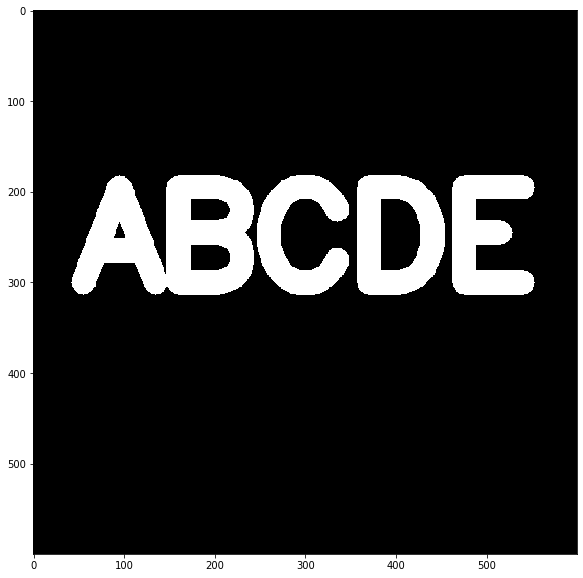

In [34]:
display_img(img)

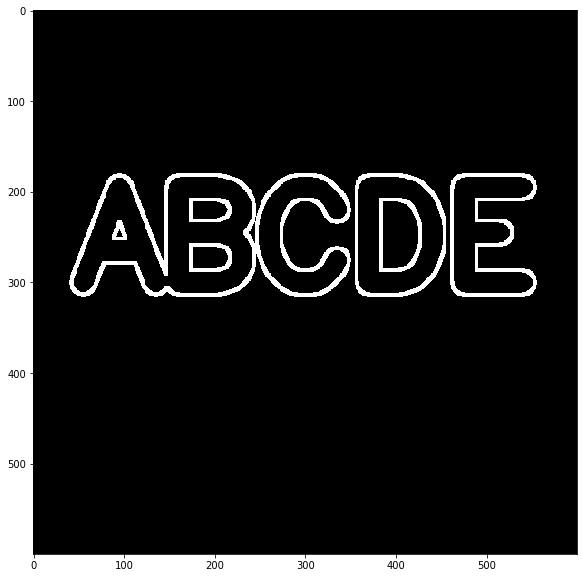

In [35]:
# Morphological gradient takes the difference of erosion and dilation. It can be used for edge detection.
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)